In [1]:
from sympy import *
init_printing()

## Tetrahedron FEM
For 2d of 3d FEM using triangular or tetrahedron cells we use the following base function
$$
\phi(\vec{x}) = \vec{a} \cdot \vec{x} + b
$$
with the derivatives
$$
\frac{\partial \phi}{\partial x_i} = a_i
$$

### 2d Triangular FEM
Given a cell $(\bullet)_c$ the coefficients $\vec{a}_v$ and $b_v$ of a $\phi_{c, v}$ centered on a vertec $v$ can be found as
$$
\phi_{c, v}(\vec{x}_k) = 1\\
\phi_{c, v}(\vec{x}_{k + 1}) = 0\\
\phi_{c, v}(\vec{x}_{k + 2}) = 0
$$

### Cartesian homegeneous heat equation
Given the heat equation
$$
T_{xx} + T_{yy} = 0
$$
we can write
$$
\sum_{i = 1}^{N - 1} T_i \underbrace{\int_{\Omega} \frac{\partial\phi_{i}}{\partial x} \frac{\partial\phi}{\partial x} +  \frac{\partial\phi_{i}}{\partial y} \frac{\partial\phi}{\partial y}\mathrm{d}x \mathrm{d}y}_{[\phi_i, \phi]_x + [\phi_i, \phi]_y} = 0
$$
Thus we have to solve
$$
[\phi_i, \phi_i]_{x_i} = ???\\
[\phi_{i + 1}, \phi_i]_{x_i} = ???\\
[\phi_{i + 2}, \phi_i]_{x_i} = ???
$$

On a unit triagle we get
$$
x = x_i + (x_{i + 1} - x_i) \xi + (x_{i + 2} - x_i) \eta\\
y = y_i + (y_{i + 1} - y_i) \xi + (y_{i + 2} - y_i) \eta
$$
which gets as
$$
\phi(\xi, \eta) = \tilde{a}_0 \xi + \tilde{a}_1 \eta + \tilde{b}
$$
where
$$
\tilde{a}_0 = a_0(x_{i+1} - x_i) + a_1(y_{i+1} - y_i)\\
\tilde{a}_1 = a_0(x_{i+2} - x_i) + a_1(y_{i+2} - y_i)\\
\tilde{b} = a_0 x_i + a_1 y_i + b
$$
and
$$
a_0 = \frac{y_{i+1} - y_{i+2}}{x_i(y_{i+1} - y_{i+2}) + x_{i+1}(-y_i + y_{i+2}) + x_{i+2}(y_i - y_{i+1})}\\
a_1 = -\frac{x_{i+1} - x_{i+2}}{x_i(y_{i+1} - y_{i+2}) + x_{i+1}(-y_i + y_{i+2}) + x_{i+2}(y_i - y_{i+1})}\\
b = \frac{x_{i+1} y_{i+2} - x_{i+2} y_{i+1}}{x_i (y_{i+1} - y_{i+2}) + x_{i+1} (-y_i + y_{i+2}) + x_{i+2} (y_i - y_{i+1})}
$$

In [2]:
a0, a1, b = symbols("a_0 a_1 b", real=True)
xi, yi = symbols("x_i y_i", real=True)
xip, yip= symbols("x_{i+1} y_{i+1}", real=True)
xipp, yipp= symbols("x_{i+2} y_{i+2}", real=True)
x, y = symbols("x y", real=True)

In [3]:
phi_i = a0*xi + a1*yi + b - 1
phi_ip = a0*xip + a1*yip + b
phi_ipp = a0*xipp + a1*yipp + b

In [4]:
res = solve([phi_i, phi_ip, phi_ipp], [a0, a1, b])

In [5]:
print(factor(res[a0], (xi, xip, xipp)))

(y_{i+1} - y_{i+2})/(x_i*(y_{i+1} - y_{i+2}) + x_{i+1}*(-y_i + y_{i+2}) + x_{i+2}*(y_i - y_{i+1}))


In [6]:
print(factor(res[a1], (xi, xip, xipp)))

-(x_{i+1} - x_{i+2})/(x_i*(y_{i+1} - y_{i+2}) + x_{i+1}*(-y_i + y_{i+2}) + x_{i+2}*(y_i - y_{i+1}))


In [7]:
print(factor(res[b], (xi, xip, xipp)))

(x_{i+1}*y_{i+2} - x_{i+2}*y_{i+1})/(x_i*(y_{i+1} - y_{i+2}) + x_{i+1}*(-y_i + y_{i+2}) + x_{i+2}*(y_i - y_{i+1}))


In [8]:
xxi, eta = symbols("xi eta", real=True)

In [9]:
phi = a0 * x + a1*y + b
phi = factor(phi)

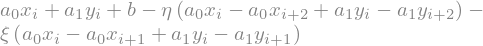

In [10]:
phi = factor(simplify(phi.subs(x, xi + (xip-xi)*xxi + (xipp - xi)*eta)))
phi = factor(simplify(phi.subs(y, yi + (yip-yi)*xxi + (yipp - yi)*eta)))
phi = factor(phi, (xxi, eta))
phi

In [11]:
print(phi)

a_0*x_i + a_1*y_i + b - eta*(a_0*x_i - a_0*x_{i+2} + a_1*y_i - a_1*y_{i+2}) - xi*(a_0*x_i - a_0*x_{i+1} + a_1*y_i - a_1*y_{i+1})
